Training shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8121 - loss: 0.7273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9124 - loss: 0.3153
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9216 - loss: 0.2828
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9238 - loss: 0.2743
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9248 - loss: 0.2685
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9145 - loss: 0.3019
Test Accuracy: 0.9251999855041504
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step
Predicted label: 7
Actual label: 7


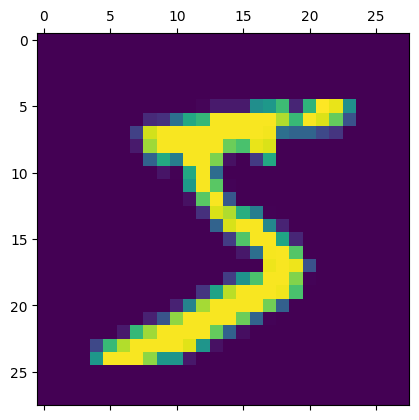

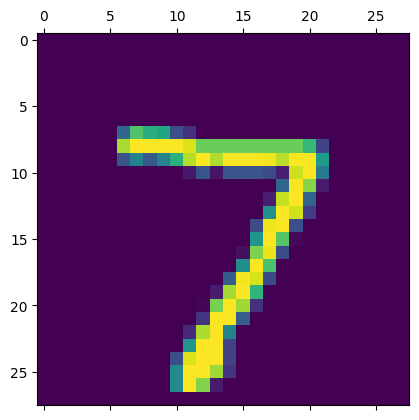

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Check shapes
print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)

# Visualize an image
plt.matshow(x_train[0])

# Normalize pixel values (Only for x_train)
x_train = x_train / 255.0
x_test = x_test / 255.0  # Also normalize test data

# Flatten the image data
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train_flat, y_train, epochs=5)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print("Test Accuracy:", test_accuracy)

# Visualize a test image
plt.matshow(x_test[0])

# Predict on test data
predictions = model.predict(x_test_flat)

# Print predicted and actual value for first test image
print("Predicted label:", np.argmax(predictions[0]))
print("Actual label:", y_test[0])


In [5]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9145 - loss: 0.3019


[0.26574987173080444, 0.9251999855041504]

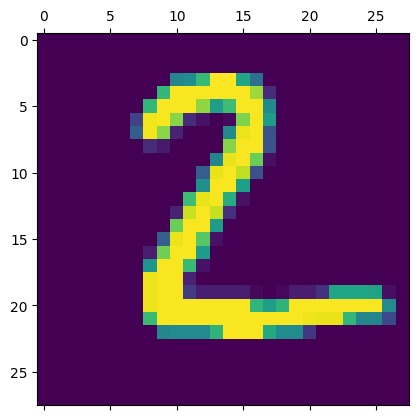

In [11]:
plt.matshow(x_test[1])

In [8]:
prediction = model.predict(x_test_flat)
prediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step


array([2.1075942e-02, 2.5682849e-07, 5.0112654e-02, 9.6013665e-01,
       2.5280160e-03, 1.2949856e-01, 1.5309453e-06, 9.9978691e-01,
       7.5435229e-02, 6.6779482e-01], dtype=float32)

In [10]:
np.argmax(prediction[1])

np.int64(2)

In [12]:
pred = [np.argmax(i) for i in prediction]
pred[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [13]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [14]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=pred)

In [15]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    7,    6,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    9,  926,   16,    7,    4,   13,   10,   37,    4],
       [   4,    0,   19,  917,    1,   28,    2,    9,   21,    9],
       [   2,    1,    3,    1,  913,    0,   11,    4,   10,   37],
       [   8,    2,    3,   27,   10,  786,   17,    5,   28,    6],
       [  12,    3,    4,    1,    7,   14,  914,    2,    1,    0],
       [   1,    5,   21,    7,    8,    1,    0,  948,    3,   34],
       [   7,    9,    6,   22,    9,   35,    9,   11,  858,    8],
       [  11,    7,    1,   11,   28,    7,    0,   21,    5,  918]],
      dtype=int32)>

In [16]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/509.2 kB ? eta -:--:--
    --------------------------------------- 10.2/509.2 kB ? eta -:--:--
   ------ --------------------------------- 81.9/509.2 kB 1.1 MB/s eta 0:00:01
   ------- ------------------------------- 92.2/509.2 kB 871.5 kB/s eta 0:00:01
   ----------------- ---------------------- 225.3/509.2 kB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 348.2/509.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  501.8/509.2 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 509.2/509.2 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/347.8 kB ? eta -:--:--
   ---------------------------------------- 347.8/347.8


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


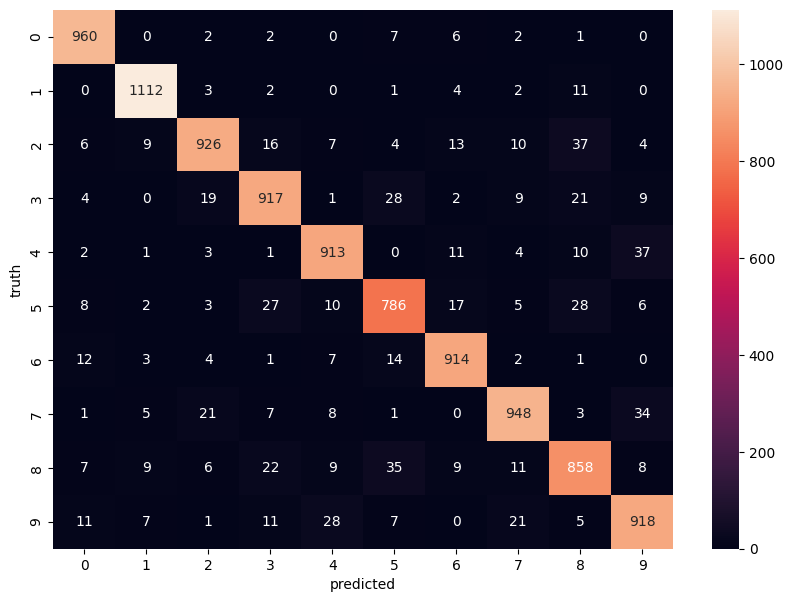

In [17]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train_flat, y_train, epochs=5)

c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8696 - loss: 0.4633
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9591 - loss: 0.1362
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9733 - loss: 0.0910
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9810 - loss: 0.0668
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9845 - loss: 0.0519


In [19]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0883


[0.07610224187374115, 0.9761999845504761]

In [20]:
prediction = model.predict(x_test_flat)
prediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([1.47302458e-02, 2.04116246e-03, 9.42787945e-01, 9.32120025e-01,
       7.58210590e-05, 1.80286425e-03, 1.12882174e-06, 9.99997854e-01,
       1.15522444e-01, 1.55194178e-01], dtype=float32)

In [21]:
np.argmax(prediction[1])

np.int64(2)

In [22]:
pred = [np.argmax(i) for i in prediction]
pred[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=pred)

In [26]:
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    1,    0,    1,    0,    2,    1,    1,    0],
       [   0, 1121,    4,    0,    0,    1,    4,    1,    4,    0],
       [   5,    1, 1012,    1,    1,    0,    1,    6,    5,    0],
       [   0,    1,    8,  962,    1,   13,    3,    7,   11,    4],
       [   2,    0,    5,    0,  958,    1,    3,    2,    2,    9],
       [   3,    1,    0,    1,    1,  875,    5,    2,    3,    1],
       [   2,    2,    3,    1,    4,    4,  939,    1,    2,    0],
       [   1,    5,   13,    0,    0,    0,    0, 1002,    2,    5],
       [   7,    0,    2,    2,    4,    3,    2,    3,  948,    3],
       [   3,    4,    0,    4,   10,    5,    0,    7,    4,  972]],
      dtype=int32)>

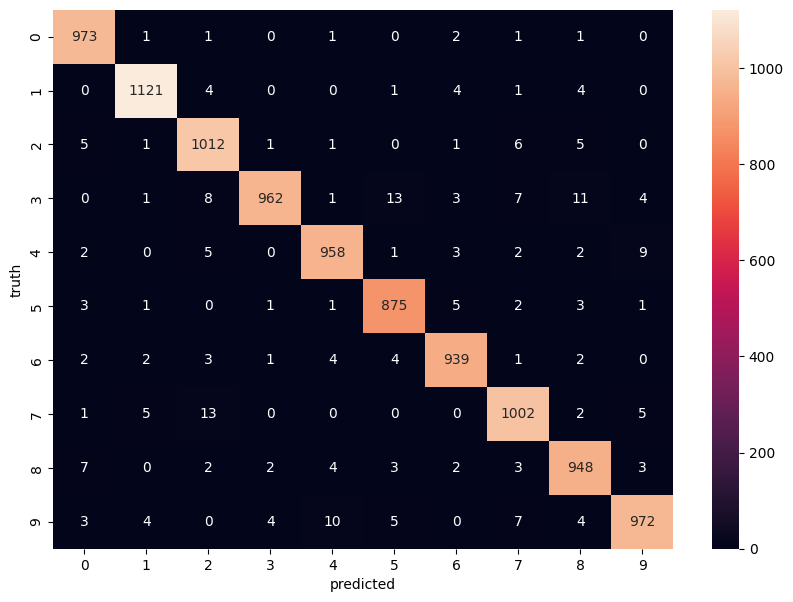

In [27]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=5)

c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8668 - loss: 0.4644
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9611 - loss: 0.1320
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9738 - loss: 0.0893
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9801 - loss: 0.0664
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9839 - loss: 0.0537
